<a href="https://colab.research.google.com/github/ahsan-reaz-96/khudalagce-client/blob/main/image_processing_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

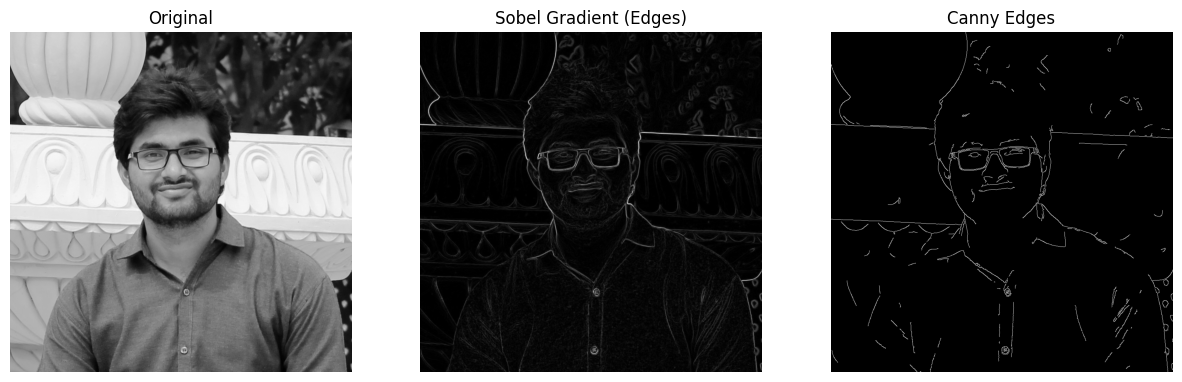

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/cv_reaz_img_apply_all.jpg", cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # edges in x
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # edges in y
sobel_combined = cv2.magnitude(sobelx, sobely)

# Canny Edge Detection
edges = cv2.Canny(img, 100, 200)

# Show results
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Gradient (Edges)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.show()


more edge detection algo


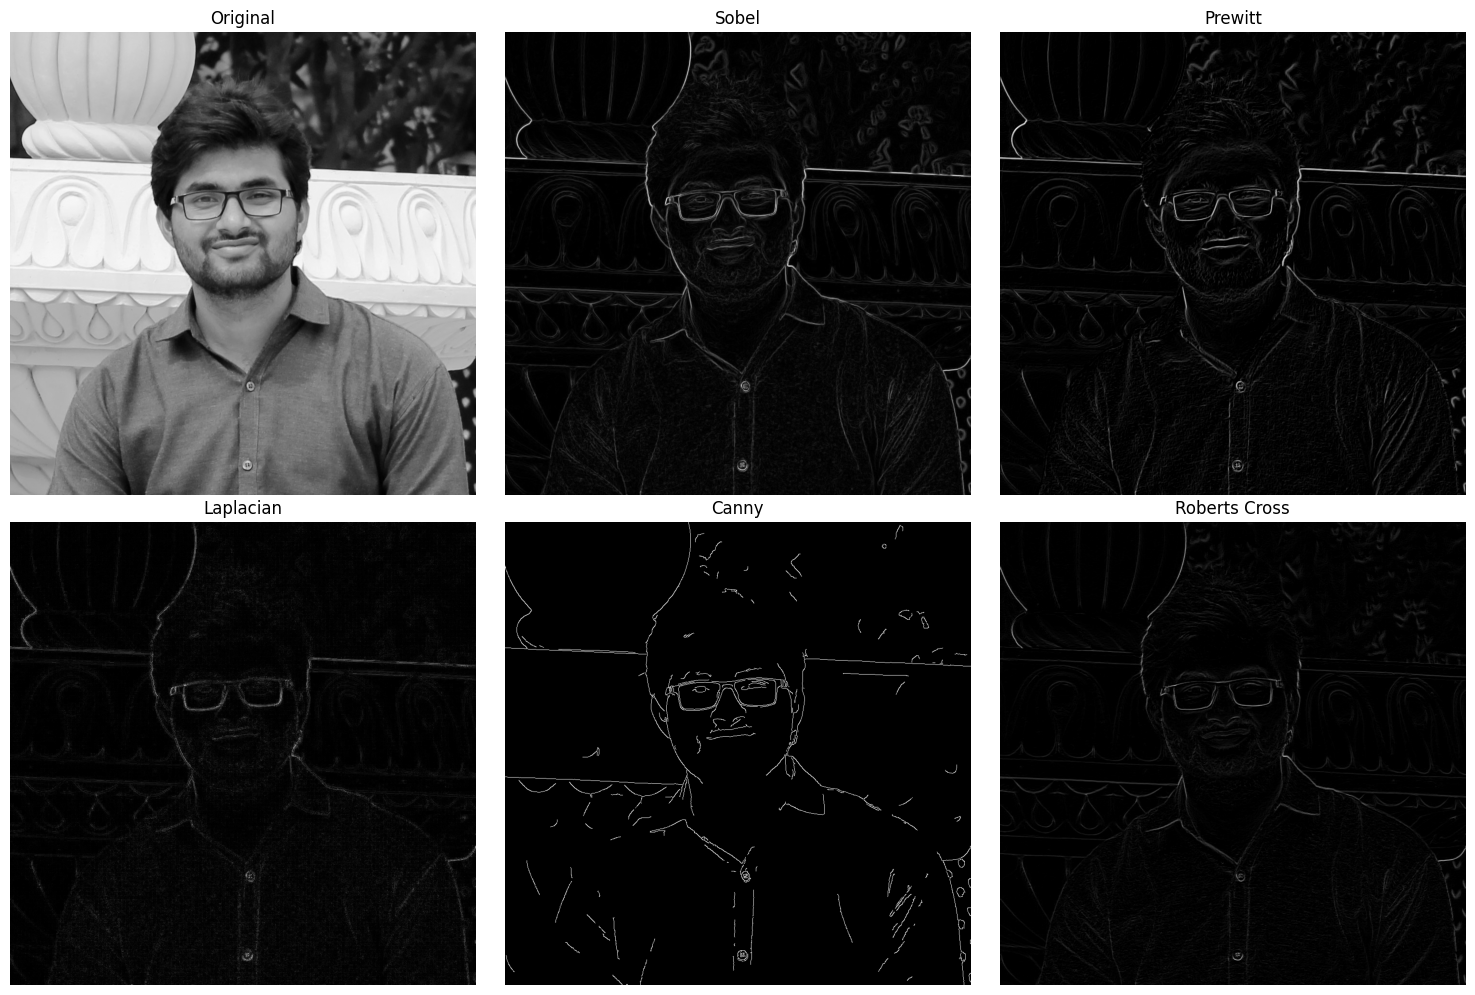

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load grayscale image
img = cv2.imread("/content/cv_reaz_img_apply_all.jpg", cv2.IMREAD_GRAYSCALE)

# 1. Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# 2. Prewitt Edge Detection (by filtering manually)
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)
prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

# 3. Laplacian Edge Detection
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
# 4. Canny Edge Detection
canny = cv2.Canny(img, 100, 200)

# 5. Roberts Cross Operator (manual implementation)
kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])
robertsx = cv2.filter2D(img, -1, kernelx)
robertsy = cv2.filter2D(img, -1, kernely)
roberts = cv2.magnitude(robertsx.astype(float), robertsy.astype(float))

# Plot all results
plt.figure(figsize=(15,10))

plt.subplot(2,3,1), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.axis("off")

plt.subplot(2,3,2), plt.imshow(sobel, cmap='gray')
plt.title("Sobel"), plt.axis("off")

plt.subplot(2,3,3), plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt"), plt.axis("off")

plt.subplot(2,3,4), plt.imshow(laplacian_abs, cmap='gray')
plt.title("Laplacian"), plt.axis("off")

plt.subplot(2,3,5), plt.imshow(canny, cmap='gray')
plt.title("Canny"), plt.axis("off")

plt.subplot(2,3,6), plt.imshow(roberts, cmap='gray')
plt.title("Roberts Cross"), plt.axis("off")

plt.tight_layout()
plt.show()


point detection

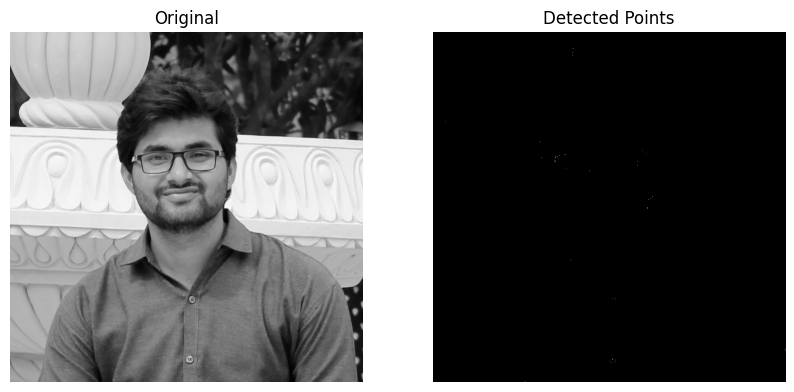

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread("/content/cv_reaz_img_apply_all.jpg", cv2.IMREAD_GRAYSCALE)

# Point detection kernel (Laplacian-like)
point_kernel = np.array([[-1,-1,-1],
                         [-1, 8,-1],
                         [-1,-1,-1]])

# Apply filter
points = cv2.filter2D(img, -1, point_kernel)

# Threshold (to highlight strong points)
_, points_detected = cv2.threshold(points, 200, 255, cv2.THRESH_BINARY)

# Show results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.axis("off")

plt.subplot(1,2,2), plt.imshow(points_detected, cmap='gray')
plt.title("Detected Points"), plt.axis("off")

plt.show()


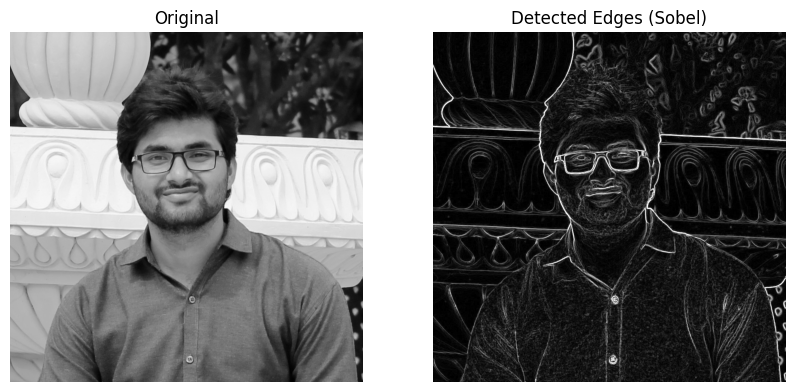

In [ ]:
# Sobel edge detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Vertical edges
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Horizontal edges

# Gradient magnitude
edges = cv2.magnitude(sobelx, sobely)

# Normalize for display
edges = cv2.convertScaleAbs(edges)

# Show results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.axis("off")

plt.subplot(1,2,2), plt.imshow(edges, cmap='gray')
plt.title("Detected Edges (Sobel)"), plt.axis("off")

plt.show()


laplacian


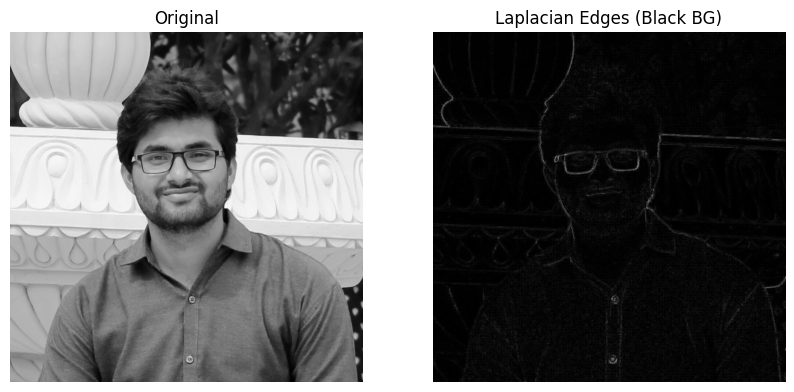

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image (grayscale)
img = cv2.imread("/content/cv_reaz_img_apply_all.jpg", cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if img is None:
    raise FileNotFoundError("Image not found. Check the file path!")

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Convert to absolute values and 8-bit (black background, white edges)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Show results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(laplacian_abs, cmap='gray'), plt.title("Laplacian Edges (Black BG)"), plt.axis("off")
plt.show()




both of object and edge


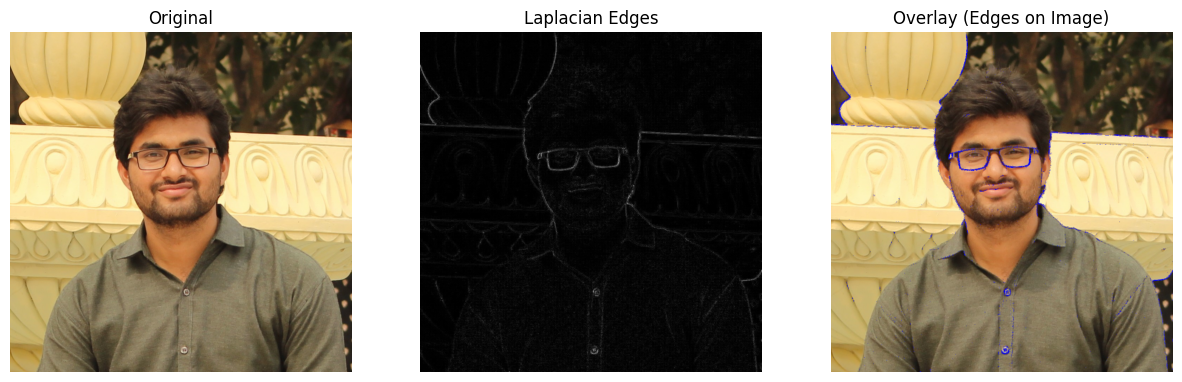

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image (grayscale)
img_gray = cv2.imread("/content/cv_reaz_img_apply_all.jpg", cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread("/content/cv_reaz_img_apply_all.jpg")  # original color image

# Check if image is loaded properly
if img_gray is None or img_color is None:
    raise FileNotFoundError("Image not found. Check the file path!")

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Create edge mask (threshold to highlight strong edges)
_, edge_mask = cv2.threshold(laplacian_abs, 30, 255, cv2.THRESH_BINARY)

# Convert edge mask to 3 channels (BGR) so it can overlay on color image
edges_bgr = cv2.cvtColor(edge_mask, cv2.COLOR_GRAY2BGR)

# Overlay edges in red on original image
overlay = img_color.copy()
overlay[edges_bgr[:,:,0] > 0] = [255, 0, 0]  # red edges

# Show results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(laplacian_abs, cmap='gray'), plt.title("Laplacian Edges"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)), plt.title("Overlay (Edges on Image)"), plt.axis("off")
plt.show()


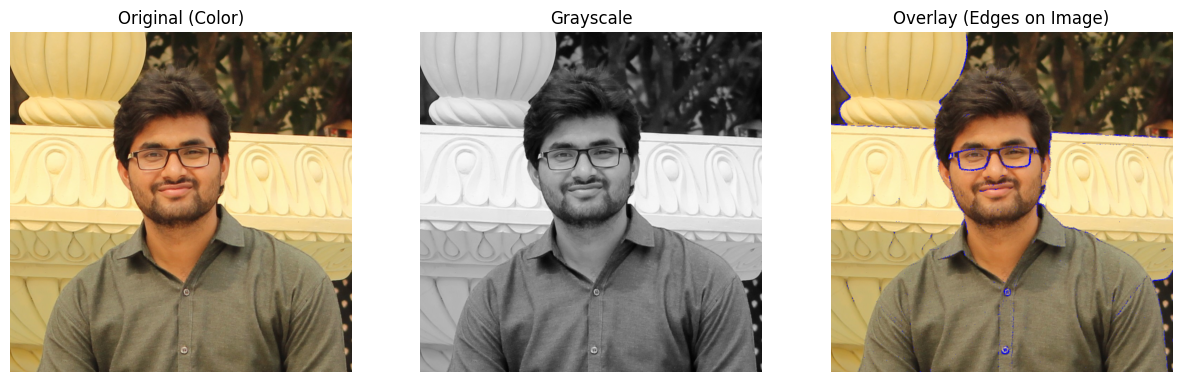

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image (color)
img_color = cv2.imread("/content/cv_reaz_img_apply_all.jpg")

# Check if image is loaded properly
if img_color is None:
    raise FileNotFoundError("Image not found. Check the file path!")

# Convert to grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Create edge mask (threshold to highlight strong edges)
_, edge_mask = cv2.threshold(laplacian_abs, 30, 255, cv2.THRESH_BINARY)

# Convert edge mask to 3 channels (BGR)
edges_bgr = cv2.cvtColor(edge_mask, cv2.COLOR_GRAY2BGR)

# Overlay edges in red on original image
overlay = img_color.copy()
overlay[edges_bgr[:,:,0] > 0] = [255, 0, 0]  # red edges

# Show results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), plt.title("Original (Color)"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(img_gray, cmap='gray'), plt.title("Grayscale"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)), plt.title("Overlay (Edges on Image)"), plt.axis("off")
plt.show()


How to detect a point — step-by-step (with code)

A point (or blob) = a single pixel or a very small region that is much brighter/darker than its neighbors (e.g. a dot, speck, or small bright spot). The general idea: preprocess → compute a response that highlights points → threshold → filter/locate → (optionally) refine and display.

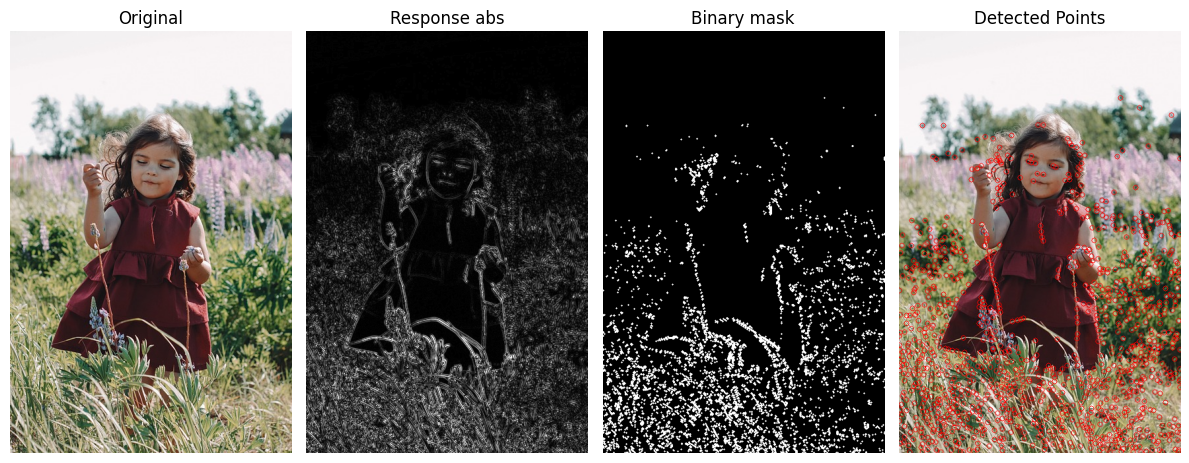

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. load
img_color = cv2.imread("/content/girl.jpg")
if img_color is None:
    raise FileNotFoundError("Image not found. Check path.")
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# 2. optional denoise
gray_blur = cv2.GaussianBlur(gray, (3,3), 0)

# 3. point detection kernel (Laplacian-like)
point_kernel = np.array([[-1,-1,-1],
                         [-1, 8,-1],
                         [-1,-1,-1]], dtype=np.float32)
resp = cv2.filter2D(gray_blur, cv2.CV_64F, point_kernel)

# 4. absolute & scale to 8-bit
resp_abs = cv2.convertScaleAbs(resp)

# 5. threshold to get binary mask of strong points
thresh_val = 50                 # <-- tune this (30-80 typical)
_, mask = cv2.threshold(resp_abs, thresh_val, 255, cv2.THRESH_BINARY)

# 6. refine mask (remove tiny noise)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# 7. connected components -> centroids
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

# filter by area and collect points
min_area = 1   # adjust (1,2,3...) depending on your points' size
points = []
for i in range(1, num_labels):  # skip background 0
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= min_area:
        cx, cy = centroids[i]
        points.append((int(cx), int(cy)))

# 8. overlay markers on original (red circles)
overlay = img_color.copy()
for (x,y) in points:
    cv2.circle(overlay, (x,y), radius=4, color=(0,0,255), thickness=1)  # BGR red

# show intermediate and final
plt.figure(figsize=(12,6))
plt.subplot(1,4,1), plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,2), plt.imshow(resp_abs, cmap='gray'), plt.title("Response abs"), plt.axis("off")
plt.subplot(1,4,3), plt.imshow(mask, cmap='gray'), plt.title("Binary mask"), plt.axis("off")
plt.subplot(1,4,4), plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)), plt.title("Detected Points"), plt.axis("off")
plt.tight_layout(); plt.show()


Method B — Blob detector (OpenCV SimpleBlobDetector) — robust & parameterized

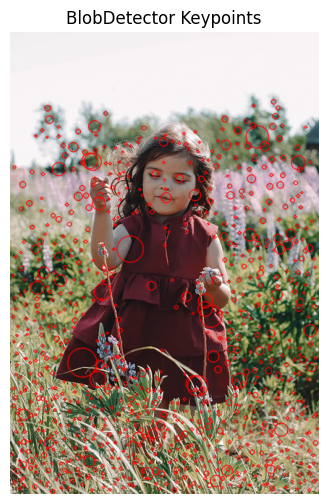

In [2]:
import cv2

# set up detector params
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 5
params.maxArea = 5000
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
# detect (works on grayscale)
keypoints = detector.detect(gray)

# draw keypoints
im_with_keypoints = cv2.drawKeypoints(img_color, keypoints, None, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB)); plt.title("BlobDetector Keypoints"); plt.axis("off")
plt.show()



Method C — DoG / LoG (scale-space) — multi-scale point detection

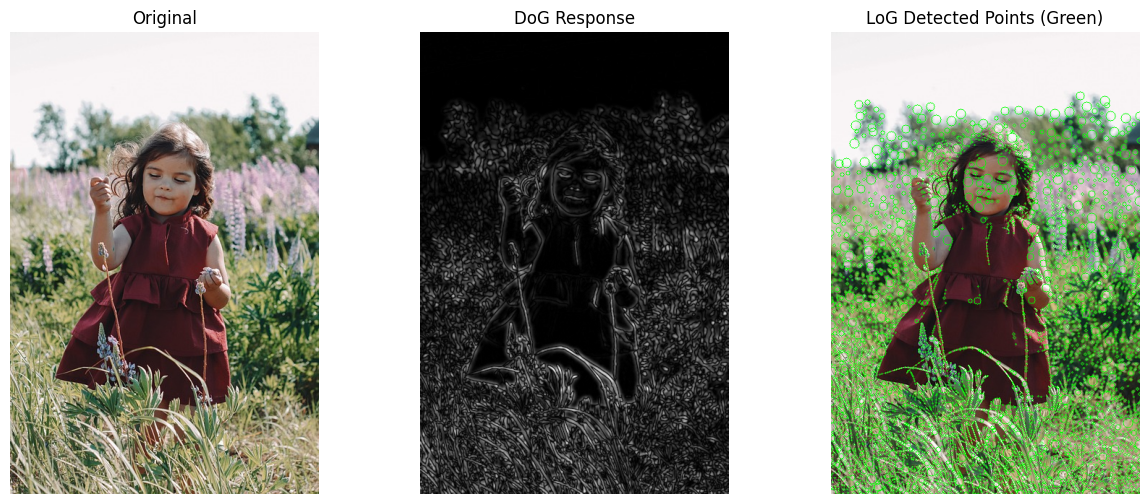

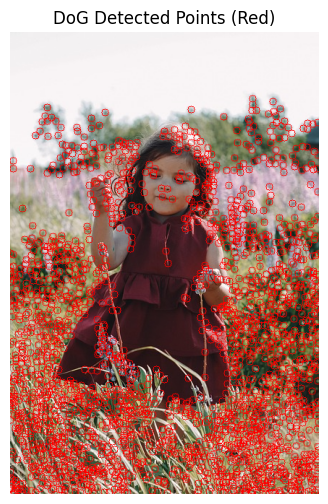

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log

# Load image (color + grayscale)
img_color = cv2.imread("/content/girl.jpg")
if img_color is None:
    raise FileNotFoundError("Image not found. Check path.")

gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# --- Method 1: DoG (Difference of Gaussians) manually ---
# Apply two Gaussians with different sigma
blur_small = cv2.GaussianBlur(gray, (0,0), sigmaX=1.0)
blur_large = cv2.GaussianBlur(gray, (0,0), sigmaX=3.0)

dog = cv2.absdiff(blur_small, blur_large)

# Threshold the DoG response to detect blobs
_, mask_dog = cv2.threshold(dog, 20, 255, cv2.THRESH_BINARY)

# Find connected components (blobs)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_dog)

# Overlay detected points on original image
overlay_dog = img_color.copy()
for (x, y) in centroids[1:]:  # skip background
    cv2.circle(overlay_dog, (int(x), int(y)), 5, (0,0,255), 1)  # red circles

# --- Method 2: LoG using skimage.feature.blob_log ---
# Finds blobs in scale-space with Laplacian of Gaussian
blobs_log = blob_log(gray, max_sigma=5, num_sigma=10, threshold=0.03)

overlay_log = img_color.copy()
for y, x, r in blobs_log:
    cv2.circle(overlay_log, (int(x), int(y)), int(r*1.5), (0,255,0), 1)  # green circles

# --- Plot results ---
plt.figure(figsize=(15,6))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(dog, cmap='gray'), plt.title("DoG Response"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(overlay_log, cv2.COLOR_BGR2RGB)), plt.title("LoG Detected Points (Green)"), plt.axis("off")
plt.show()

# Also show DoG overlay separately
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay_dog, cv2.COLOR_BGR2RGB)), plt.title("DoG Detected Points (Red)")
plt.axis("off")
plt.show()
